In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
transactions_df = pd.read_csv('/content/transactions.csv')
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
store_df = pd.read_csv('/content/stores.csv')
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
print(transactions_df.shape)
print(store_df.shape)

(83488, 3)
(54, 5)


In [5]:
# Merging transactiond and store data
df=pd.merge(transactions_df,store_df,on='store_nbr')
df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,Quito,Pichincha,D,13
2,2013-01-02,2,2358,Quito,Pichincha,D,13
3,2013-01-02,3,3487,Quito,Pichincha,D,8
4,2013-01-02,4,1922,Quito,Pichincha,D,9


In [6]:
df['cluster'].unique()

array([ 1, 13,  8,  9,  4,  6, 15,  7,  3, 12, 16, 10,  2,  5, 11, 14, 17])

In [7]:
# Checking for nulls
df[df.isna().any(axis=1)]

,date,store_nbr,transactions,city,state,type,cluster


In [8]:
# Checking duplciates
df[df.duplicated()]

,date,store_nbr,transactions,city,state,type,cluster


In [9]:
df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,Quito,Pichincha,D,13
2,2013-01-02,2,2358,Quito,Pichincha,D,13
3,2013-01-02,3,3487,Quito,Pichincha,D,8
4,2013-01-02,4,1922,Quito,Pichincha,D,9


### cluster is a grouping of similar stores

In [10]:
df['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

# Meanings of Store Types

* A	Large supermarket or hypermarket (high sales volume, large customer base)
* B	Medium-sized store (e.g., grocery store, department store)
* C	Small convenience store or specialty store (lower sales volume)
* D	Discount store (e.g., warehouse clubs, outlet stores)
* E	E-commerce or express store (smaller format, online-focused, limited stock)


In [11]:
type_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5
}
df['type'] = df['type'].map(type_dict)

In [12]:
df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,4,1
1,2013-01-02,1,2111,Quito,Pichincha,4,13
2,2013-01-02,2,2358,Quito,Pichincha,4,13
3,2013-01-02,3,3487,Quito,Pichincha,4,8
4,2013-01-02,4,1922,Quito,Pichincha,4,9


In [13]:
# Creating copy of DataFrame
df_eng = df.copy()

In [14]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
 3   city          83488 non-null  object
 4   state         83488 non-null  object
 5   type          83488 non-null  int64 
 6   cluster       83488 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 4.5+ MB


In [15]:
# Converting to Datetime
df_eng['date']=pd.to_datetime(df_eng['date'])

In [16]:
df_eng

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,4,1
1,2013-01-02,1,2111,Quito,Pichincha,4,13
2,2013-01-02,2,2358,Quito,Pichincha,4,13
3,2013-01-02,3,3487,Quito,Pichincha,4,8
4,2013-01-02,4,1922,Quito,Pichincha,4,9
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,Ambato,Tungurahua,1,14
83484,2017-08-15,51,1573,Guayaquil,Guayas,1,17
83485,2017-08-15,52,2255,Manta,Manabi,1,11
83486,2017-08-15,53,932,Manta,Manabi,4,13


In [17]:
# Saving DataFrame for modeling
df_eng.to_csv('/content/df_eng.csv')

In [18]:
df_eng = pd.read_csv('/content/df_eng.csv',index_col='date',parse_dates=['date'],usecols=['date','transactions']).resample('ME').mean()
df_eng.head()

,transactions
date,
2013-01-31,1657.898624
2013-02-28,1684.483696
2013-03-31,1724.181627
2013-04-30,1699.206522
2013-05-31,1702.874396


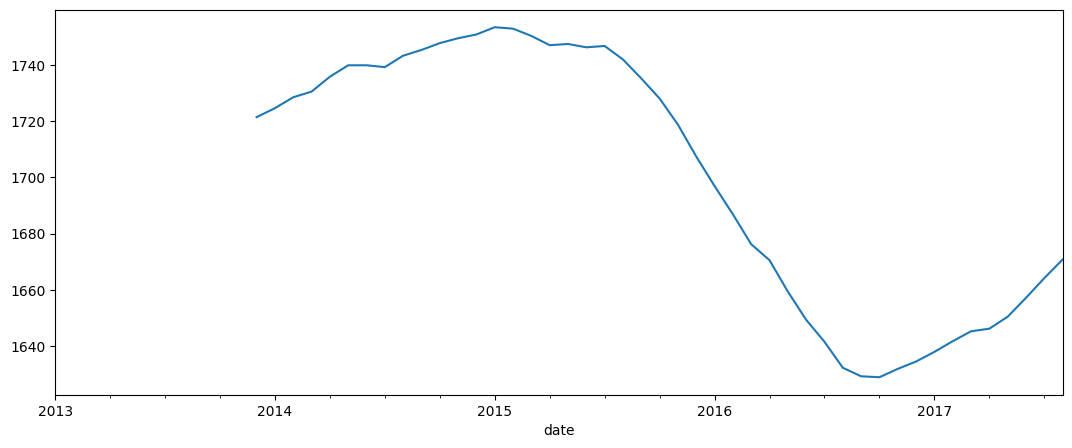

In [19]:
## Rolling Averages
## Since Data already in Months so
## 12 months = 1
## 6  months = Semestres and so on

df_eng.loc[:,"transactions"].rolling(window=12).mean().plot(figsize=(13,5));

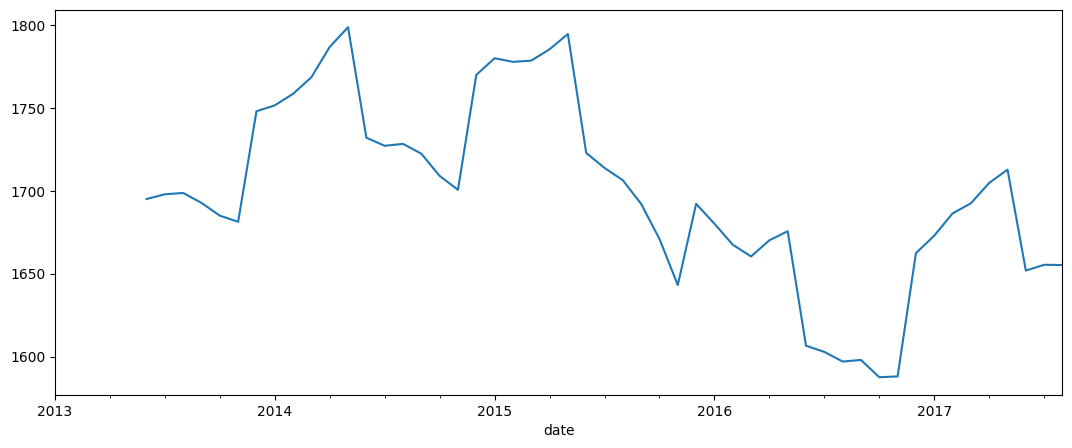

In [20]:
df_eng.loc[:,"transactions"].rolling(window=6).mean().plot(figsize=(13,5));

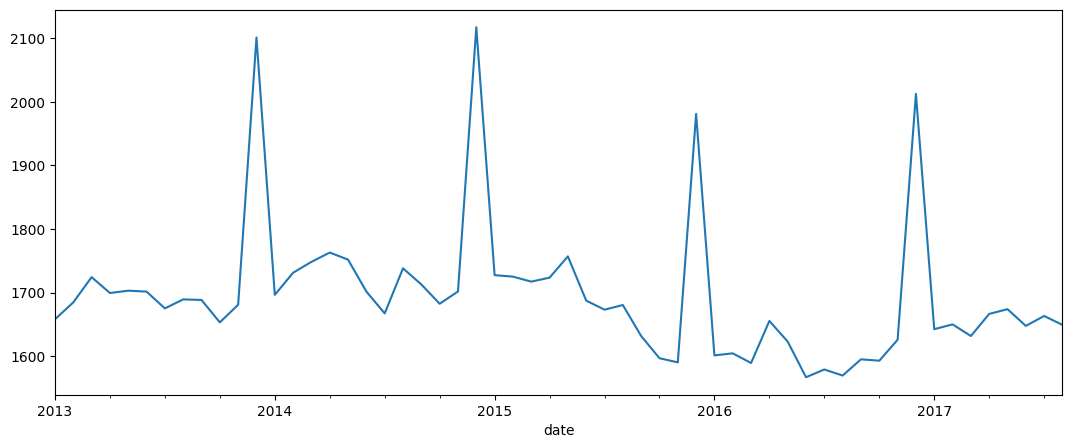

In [21]:
df_eng.loc[:,"transactions"].rolling(window=1).mean().plot(figsize=(13,5));

# Interpretation
* We may have a pattern here peack,steady,peack, down all over again

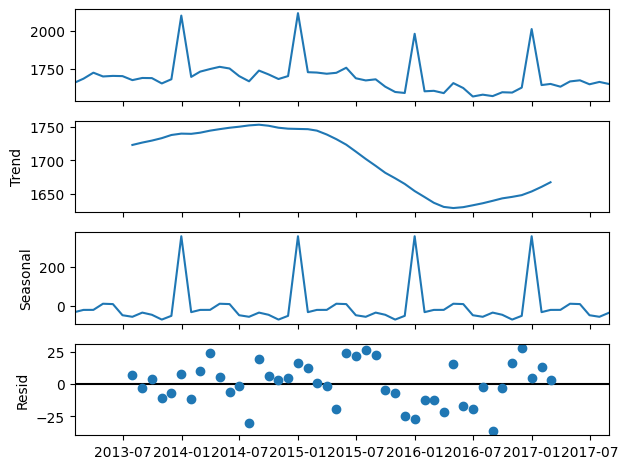

In [22]:
# Decompostion
## Additive assums trends remaing the same

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_eng,model='additive',period=12)
decompose.plot();

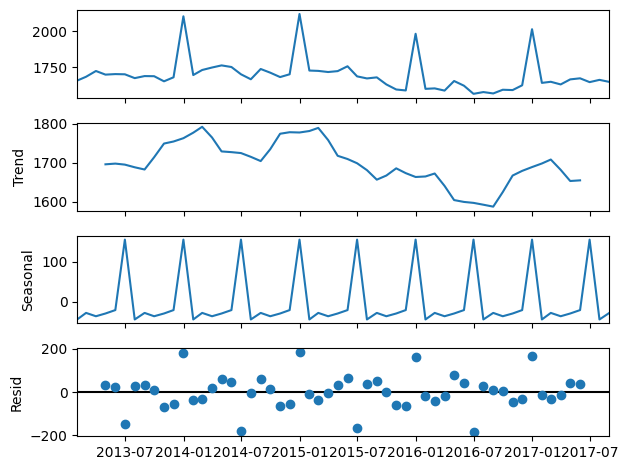

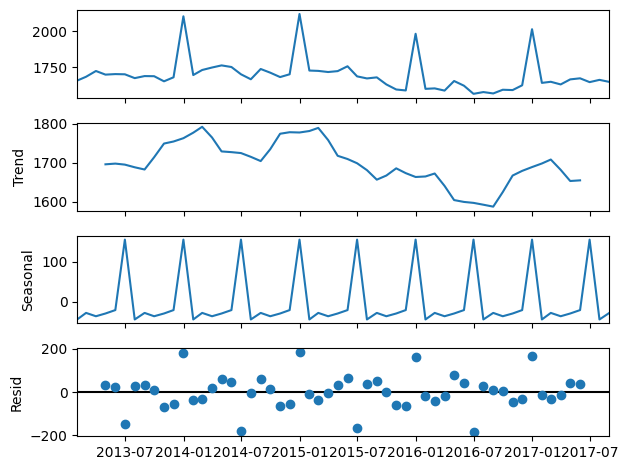

In [23]:
seasonal_decompose(df_eng,model='additive',period=6).plot()

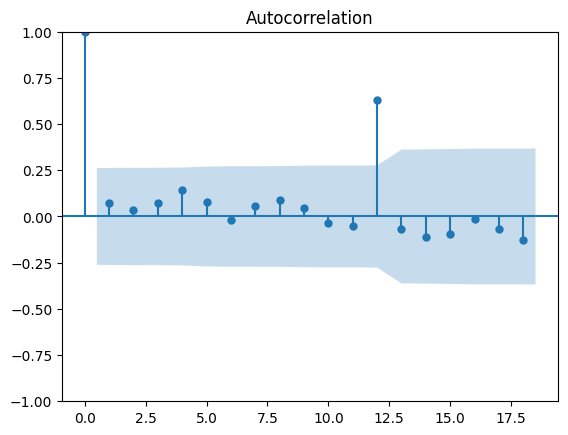

In [24]:
# Auto Correlation Chart
## Determine the len of the sesonality

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_eng);

# Interpretation
* Every 3 momths we got a peak

In [25]:
# Creating Sesonality and Trend Variables
df_eng.reset_index(inplace=True)
df_eng['Month'] = df_eng['date'].dt.month.astype('object')
df_eng.head(2)

,date,transactions,Month
0,2013-01-31,1657.898624,1
1,2013-02-28,1684.483696,2


In [26]:
dummies_df = pd.get_dummies(df_eng['Month'],drop_first=True).astype(int)
dummies_df.head(2)

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [27]:
df_new =pd.merge(df_eng,dummies_df,left_index=True,right_index=True)
df_new.head()

,date,transactions,Month,2,3,4,5,6,7,8,9,10,11,12
0,2013-01-31,1657.898624,1,0,0,0,0,0,0,0,0,0,0,0
1,2013-02-28,1684.483696,2,1,0,0,0,0,0,0,0,0,0,0
2,2013-03-31,1724.181627,3,0,1,0,0,0,0,0,0,0,0,0
3,2013-04-30,1699.206522,4,0,0,1,0,0,0,0,0,0,0,0
4,2013-05-31,1702.874396,5,0,0,0,1,0,0,0,0,0,0,0


In [28]:
cols_to_drop = ['Month']
df_new.drop(columns=cols_to_drop,axis=1,inplace=True)
df_new.head()

,date,transactions,2,3,4,5,6,7,8,9,10,11,12
0,2013-01-31,1657.898624,0,0,0,0,0,0,0,0,0,0,0
1,2013-02-28,1684.483696,1,0,0,0,0,0,0,0,0,0,0
2,2013-03-31,1724.181627,0,1,0,0,0,0,0,0,0,0,0
3,2013-04-30,1699.206522,0,0,1,0,0,0,0,0,0,0,0
4,2013-05-31,1702.874396,0,0,0,1,0,0,0,0,0,0,0


In [29]:
# Spliting Data

total = len(df_new)
Training_set = int(total*0.8)
Training_set

44

In [30]:
df_training = df_new[:-12]
df_test = df_new[-12:]

In [31]:
df_training.tail()

,date,transactions,2,3,4,5,6,7,8,9,10,11,12
39,2016-04-30,1655.218239,0,0,1,0,0,0,0,0,0,0,0
40,2016-05-31,1622.737066,0,0,0,1,0,0,0,0,0,0,0
41,2016-06-30,1566.706289,0,0,0,0,1,0,0,0,0,0,0
42,2016-07-31,1578.872185,0,0,0,0,0,1,0,0,0,0,0
43,2016-08-31,1569.375619,0,0,0,0,0,0,1,0,0,0,0


In [32]:
df_test.head()

,date,transactions,2,3,4,5,6,7,8,9,10,11,12
44,2016-09-30,1594.878272,0,0,0,0,0,0,0,1,0,0,0
45,2016-10-31,1592.686003,0,0,0,0,0,0,0,0,1,0,0
46,2016-11-30,1625.652956,0,0,0,0,0,0,0,0,0,1,0
47,2016-12-31,2012.576196,0,0,0,0,0,0,0,0,0,0,1
48,2017-01-31,1642.267756,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Fit Regression Model
import statsmodels.api as sm

X = sm.add_constant(df_training.iloc[:,2:])
y = df_training['transactions']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           transactions   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     11.51
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.96e-08
Time:                        14:20:23   Log-Likelihood:                -234.98
No. Observations:                  44   AIC:                             494.0
Df Residuals:                      32   BIC:                             515.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1670.6576     29.597     56.446      0.0

# Interpretation
* R-squared: 0.798 (Accuracy level) Not bad for fisrt model
* Durbin-Watson: 0.205 (Good Renge between 1.5 to 2.5) this is good
* P>|t| this is ok
## So far so good pretty decent model

In [34]:
# Making Predictions with Test set

X_test = sm.add_constant(df_test.iloc[:,2:])
y_test = df_test['transactions']

prediction = model.predict(X_test)
prediction.rename('Predicted',inplace=True)
prediction.head()

,Predicted
44,1677.507246
45,1643.990443
46,1657.470117
47,2066.601263
48,1670.657634


In [35]:
len(prediction)

12

In [36]:
# Predictions Vs Actual values
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df_pred

,Actual,Predicted
44,1594.878272,1677.507246
45,1592.686003,1643.990443
46,1625.652956,1657.470117
47,2012.576196,2066.601263
48,1642.267756,1670.657634
49,1649.845013,1686.223662
50,1631.555082,1694.654066
51,1666.338538,1710.164240
52,1673.765830,1708.552419
53,1647.446296,1664.230566


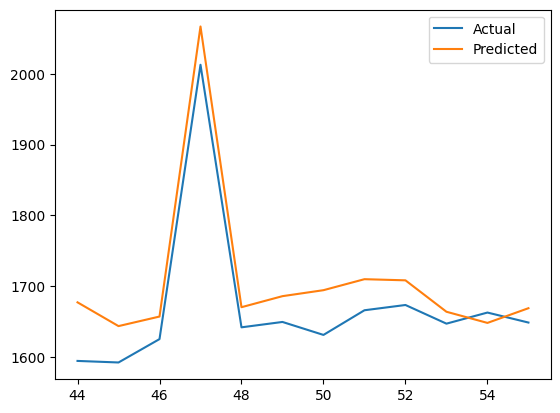

In [37]:
# Displaying Results
df_pred.plot();

In [38]:
# Performance metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

print('MAPE:',mean_absolute_percentage_error(y_test,prediction))
print('MAE:',mean_absolute_error(y_test,prediction))

MAPE: 0.023897658252817724
MAE: 39.823166442484556


## Interpretation
* Predictions are off by $39 that's good that's only 0.02%

In [39]:
# From here we could gather more data to see if predictions remain the same of if model needs improvement

In [50]:
df_eng.to_csv('/content/df_eng.csv')

In [112]:
df = pd.read_csv('/content/df_eng.csv',usecols=['date','transactions'],index_col='date',parse_dates=['date']).reset_index()
df.head()

,date,transactions
0,2013-01-31,1657.898624
1,2013-02-28,1684.483696
2,2013-03-31,1724.181627
3,2013-04-30,1699.206522
4,2013-05-31,1702.874396


In [113]:
# Facebook prophet format
df_eng = (
    df
    .set_index('date')
    .resample('ME')
    .agg({'transactions':'mean'})
    .reset_index()
    .rename({'date':'ds','transactions':'y'},axis=1)
)
df_eng.head()

,ds,y
0,2013-01-31,1657.898624
1,2013-02-28,1684.483696
2,2013-03-31,1724.181627
3,2013-04-30,1699.206522
4,2013-05-31,1702.874396


In [114]:
# spliting data
Total=len(df_eng)
Training_set = int(Total*0.8)
Training_set

44

In [115]:
X_train= df_eng[:-12]
x_test = df_eng[-12:]

In [116]:
!pip install prophet

In [117]:
# Fitting model
from prophet import Prophet
model = Prophet(seasonality_mode='additive')
model.fit(X_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl57ivxeg/bdoe9ktd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl57ivxeg/ek7nyuju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8934', 'data', 'file=/tmp/tmpl57ivxeg/bdoe9ktd.json', 'init=/tmp/tmpl57ivxeg/ek7nyuju.json', 'output', 'file=/tmp/tmpl57ivxeg/prophet_model7mpc1smz/prophet_model-20250323154302.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:43:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [118]:
prophet_df=model.make_future_dataframe(periods=12,freq='ME')
prophet_df

,ds
0,2013-01-31
1,2013-02-28
2,2013-03-31
3,2013-04-30
4,2013-05-31
5,2013-06-30
6,2013-07-31
7,2013-08-31
8,2013-09-30
9,2013-10-31


In [119]:
prophet_forecast = model.predict(prophet_df)
prophet_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-31,1709.396392,1645.267698,1674.002733,1709.396392,1709.396392,-50.258870,-50.258870,-50.258870,-50.258870,-50.258870,-50.258870,0.0,0.0,0.0,1659.137521
1,2013-02-28,1712.012318,1669.379446,1698.367978,1712.012318,1712.012318,-28.246050,-28.246050,-28.246050,-28.246050,-28.246050,-28.246050,0.0,0.0,0.0,1683.766268
2,2013-03-31,1714.908521,1682.521512,1712.493300,1714.908521,1714.908521,-17.265259,-17.265259,-17.265259,-17.265259,-17.265259,-17.265259,0.0,0.0,0.0,1697.643262
3,2013-04-30,1717.711299,1709.479161,1740.604812,1717.711299,1717.711299,7.604489,7.604489,7.604489,7.604489,7.604489,7.604489,0.0,0.0,0.0,1725.315788
4,2013-05-31,1720.607502,1703.329615,1734.691137,1720.607502,1720.607502,-0.989628,-0.989628,-0.989628,-0.989628,-0.989628,-0.989628,0.0,0.0,0.0,1719.617875
5,2013-06-30,1723.410280,1668.668511,1700.224023,1723.410280,1723.410280,-38.719558,-38.719558,-38.719558,-38.719558,-38.719558,-38.719558,0.0,0.0,0.0,1684.690721
6,2013-07-31,1726.306483,1663.468404,1693.089083,1726.306483,1726.306483,-47.705823,-47.705823,-47.705823,-47.705823,-47.705823,-47.705823,0.0,0.0,0.0,1678.600660
7,2013-08-31,1729.202687,1685.084590,1714.541457,1729.202687,1729.202687,-29.936550,-29.936550,-29.936550,-29.936550,-29.936550,-29.936550,0.0,0.0,0.0,1699.266137
8,2013-09-30,1732.005465,1670.924567,1702.802810,1732.005465,1732.005465,-44.483621,-44.483621,-44.483621,-44.483621,-44.483621,-44.483621,0.0,0.0,0.0,1687.521844
9,2013-10-31,1734.901668,1634.042911,1665.128593,1734.901668,1734.901668,-84.642948,-84.642948,-84.642948,-84.642948,-84.642948,-84.642948,0.0,0.0,0.0,1650.258720


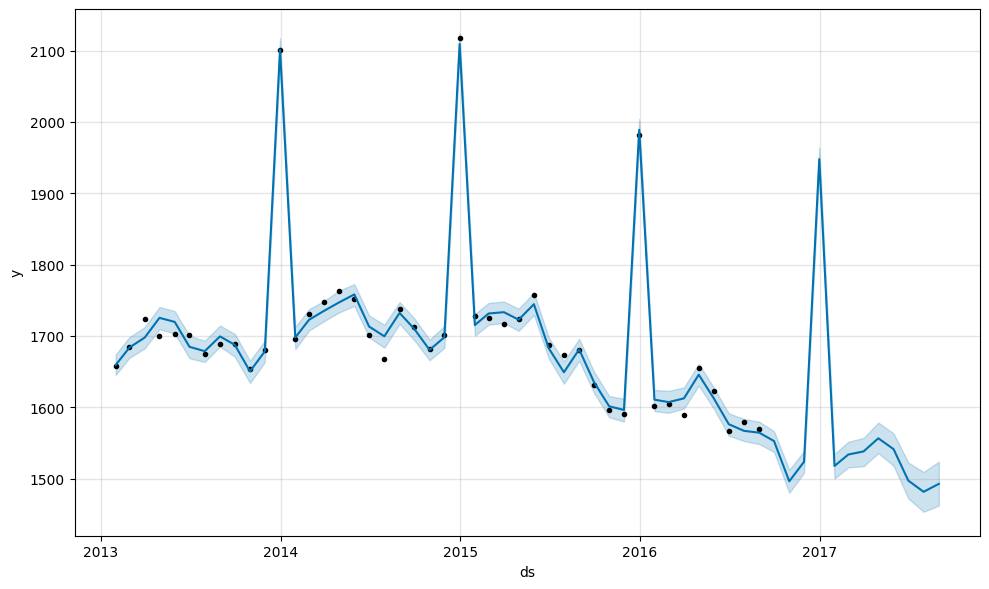

In [120]:
model.plot(prophet_forecast);

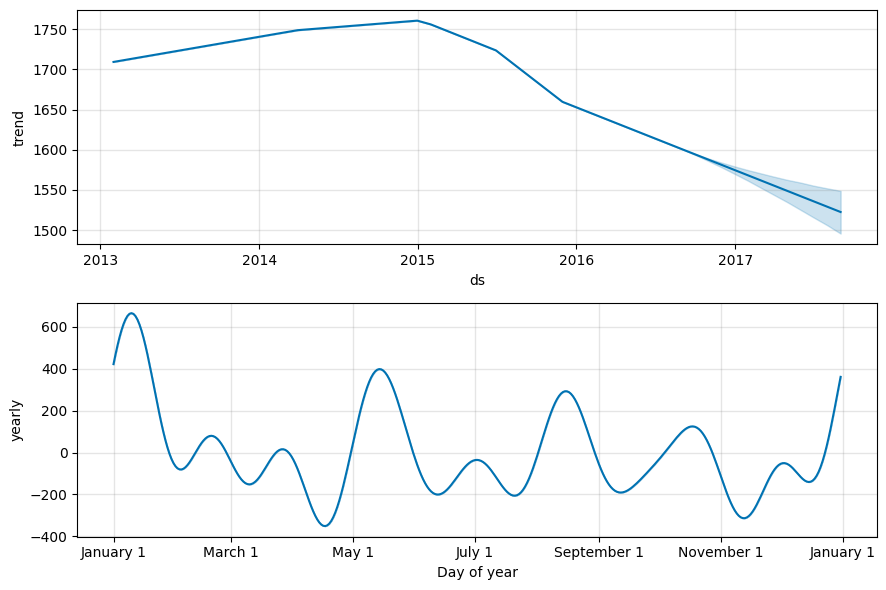

In [121]:
# Trends and sesonality
model.plot_components(prophet_forecast);

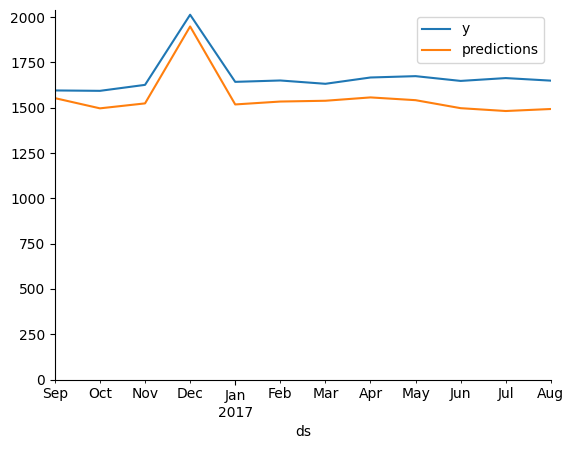

In [123]:
# Predictions Vs Actual values (y)
(x_test
 .assign(predictions = model.predict(prophet_df)['yhat'] )
    .set_index('ds')
    .plot()
)
plt.ylim(0)
sns.despine()

In [127]:
# Performance Metrics
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

forecast = model.predict(prophet_df).iloc[-12:,-1]
y_test = x_test['y']


print(mean_absolute_percentage_error( y_test,forecast))
print(mean_absolute_error( y_test,forecast))

0.06887374066594003
114.2752521883911


# Interpretation

* Predicitons are off by $114 that's 0.07% meaning our OLS model is better so far!!!!